In [518]:
import pandas as pd
import numpy as np

In [519]:
aparts = pd.read_csv('./data/aparts.csv')
aparts = aparts[aparts['주소(시도)k-apt주소split'] == '서울'][['k-아파트코드','k-아파트명','주소(시군구)','주소(읍면동)','좌표X','좌표Y']]
aparts = aparts.drop_duplicates(subset='k-아파트코드') # 중복 아파트 제거
aparts = aparts.rename(columns={'좌표X': 'lon', '좌표Y': 'lat'})
aparts

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat
0,A15679103,우리유앤미,동작구,흑석동,126.959639,37.500668
1,A13876112,송파파인타운13단지,송파구,장지동,127.129179,37.476897
2,A13873701,오금현대백조(임대),송파구,오금동,127.128775,37.508906
3,A15275101,개봉건영,구로구,개봉동,126.840675,37.501162
4,A13991016,월계동원베네스트,노원구,월계동,127.058220,37.631732
...,...,...,...,...,...,...
2794,A10022430,신길AK푸르지오주상복합,영등포구,신길동,126.910099,37.506605
2795,A10022476,논현 e편한세상,강남구,논현동,127.028762,37.506865
2796,A10022525,강동헤리티지자이,강동구,길동,127.148697,37.539149
2797,A10022419,길음역 롯데캐슬 트윈골드,성북구,길음동,127.022976,37.603698


In [520]:
def ROI_facilities(row):
      # 관심영역 설정: 3km 이내의 데이터를 뽑아옴
    delta = 0.027  # 약 1km에 해당하는 값 (정확하지 않음) 대략적인 근삿값으로 계산 

    min_lat = row['lat'] - delta
    max_lat = row['lat'] + delta
    min_lon = row['lon'] - delta
    max_lon = row['lon'] + delta
    return pd.Series({'min_lat': min_lat, 'max_lat': max_lat, 'min_lon': min_lon, 'max_lon': max_lon})






In [521]:
aparts[['min_lat', 'max_lat', 'min_lon', 'max_lon']] = aparts.apply(ROI_facilities, axis=1)


In [522]:
aparts

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat,min_lat,max_lat,min_lon,max_lon
0,A15679103,우리유앤미,동작구,흑석동,126.959639,37.500668,37.473668,37.527668,126.932639,126.986639
1,A13876112,송파파인타운13단지,송파구,장지동,127.129179,37.476897,37.449897,37.503897,127.102179,127.156179
2,A13873701,오금현대백조(임대),송파구,오금동,127.128775,37.508906,37.481906,37.535906,127.101775,127.155775
3,A15275101,개봉건영,구로구,개봉동,126.840675,37.501162,37.474162,37.528162,126.813675,126.867675
4,A13991016,월계동원베네스트,노원구,월계동,127.058220,37.631732,37.604732,37.658732,127.031220,127.085220
...,...,...,...,...,...,...,...,...,...,...
2794,A10022430,신길AK푸르지오주상복합,영등포구,신길동,126.910099,37.506605,37.479605,37.533606,126.883099,126.937099
2795,A10022476,논현 e편한세상,강남구,논현동,127.028762,37.506865,37.479865,37.533865,127.001762,127.055763
2796,A10022525,강동헤리티지자이,강동구,길동,127.148697,37.539149,37.512149,37.566149,127.121697,127.175697
2797,A10022419,길음역 롯데캐슬 트윈골드,성북구,길음동,127.022976,37.603698,37.576698,37.630698,126.995976,127.049976


In [523]:
safety = pd.read_csv('./export/safety/filtered_safety_center_data_seoul.csv')

safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   센터명     144 non-null    object 
 1   구분      144 non-null    int64  
 2   주소      144 non-null    object 
 3   전화번호    144 non-null    object 
 4   FAX     144 non-null    object 
 5   lat     135 non-null    float64
 6   lon     135 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.0+ KB


In [524]:
polices = pd.read_csv('./export/safety/policeFacilityOutput.csv')

polices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      243 non-null    int64  
 1   주소      243 non-null    object 
 2   이름      243 non-null    object 
 3   lat     66 non-null     float64
 4   lon     66 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.6+ KB


In [525]:
safety = safety.dropna(subset=['lat', 'lon'])
polices = polices.dropna(subset=['lat', 'lon'])

In [526]:
# 범위 내의 시설인지 확인하는 함수
def in_range(row, aparts_df):
    scroe = 0
    # row의 위도와 경도가 aparts_df의 범위에 있는지 확인
    in_lat_range = (row['lat'] >= aparts_df['min_lat']) & (row['lat'] <= aparts_df['max_lat'])
 
    in_lon_range = (row['lon'] >= aparts_df['min_lon']) & (row['lon'] <= aparts_df['max_lon'])
   
    # 위도와 경도가 모두 범위 내에 있는지 여부를 확인
    
    
    # result 값이 False인 항목의 개수 출력
    #print(f"Number of False results: {(result == True).sum()}")
  
    
    return (in_lat_range & in_lon_range)

In [527]:


mask_safety = safety.apply(lambda row: in_range(row, aparts), axis=1)
mask_polices = polices.apply(lambda row: in_range(row, aparts), axis=1)


In [528]:

#aparts['police'] = [[] for _ in range(len(aparts))]

aparts['fireVal'] = 0
aparts['policeVal'] = 0


for i, apart in aparts.iterrows():
    safety_value = safety[mask_safety[i]][['센터명','구분']]
    polices_value = polices[mask_polices[i]][['이름','구분']]
    # 센터명이 비어 있지 않으면
    if not safety_value.empty:
        aparts.at[i, 'fireVal'] = safety_value['구분'].sum()
    if not polices_value.empty:
        aparts.at[i, 'policeVal'] = polices_value['구분'].sum()
    

    

In [529]:
aparts['fireVal'].value_counts()

fireVal
8     336
6     331
7     328
9     226
5     225
10    205
4     188
11    180
13    136
12    134
3     106
14    103
2      88
15     72
0      35
16     34
1      26
17      7
19      2
Name: count, dtype: int64

In [530]:
aparts['policeVal'].value_counts()

policeVal
2     456
5     370
3     360
4     321
0     202
7     178
6     163
9     118
1     108
8      99
10     69
11     64
12     48
13     47
15     42
17     40
14     29
18     18
16      9
19      9
20      5
22      3
23      2
21      2
Name: count, dtype: int64

In [531]:
aparts.head(1)

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat,min_lat,max_lat,min_lon,max_lon,fireVal,policeVal
0,A15679103,우리유앤미,동작구,흑석동,126.959639,37.500668,37.473668,37.527668,126.932639,126.986639,6,4


In [532]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
aparts[['fireVal','policeVal']]= scaler.fit_transform(aparts[['fireVal','policeVal']])

In [533]:
trainDf  = aparts[['fireVal','policeVal']]

array([[0.37377049, 0.59401283],
       [0.30035933, 0.12371224],
       [0.61966443, 0.27468509]])

C:\Users\fenpon\AppData\Local\Temp\ipykernel_34476\2200862760.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aparts[aparts['DistanceToCenter']  < originDistance[aparts['cluster']]]['DistanceToCenter'] = aparts['DistanceToCenter'] * -1
C:\Users\fenpon\AppData\Local\Temp\ipykernel_34476\2200862760.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aparts[aparts['DistanceToCenter']  >= originDistance[aparts['cluster']]]['DistanceToCenter'] = aparts['DistanceToCenter'] * 1


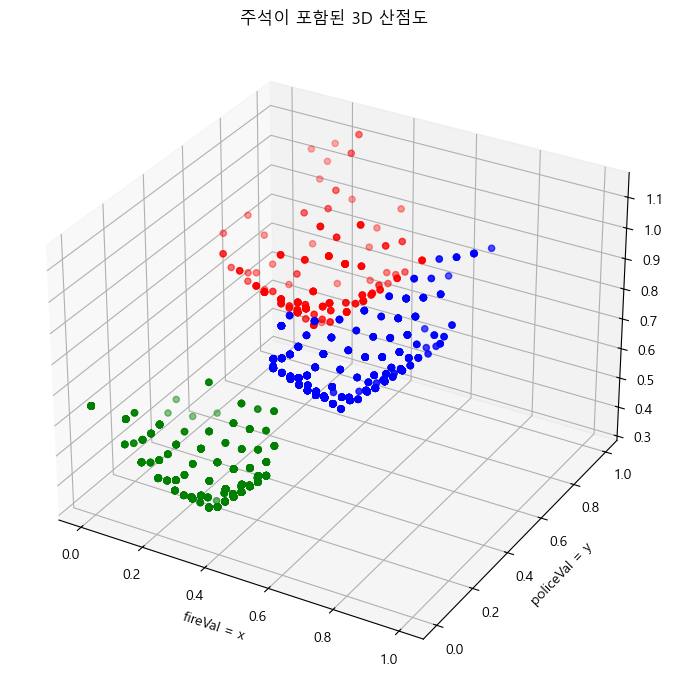

'\n# 산점도 그리기\nplt.figure(figsize=(10, 7))\nplt.grid()\nxCord = np.sqrt(aparts[colPlot[0]]**2 + aparts[colPlot[1]]**2)\nplt.scatter(  aparts["score"], xCord, c=color_map, marker=\'o\')\nplt.xlabel(\'result\')\nplt.ylabel(colPlot[0] + " + "+colPlot[1] + " = x" )\n'

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import script.common

classes = ['상','중','하']
colors = ['b','g','r']

kmeans = KMeans(n_clusters=3, random_state=42)  # 3개의 클러스터로 나누기
aparts['cluster'] = kmeans.fit_predict(trainDf)

centroids = kmeans.cluster_centers_
display(centroids)

orderCols = ['fireVal','policeVal'] # 실제 학습시키는 colums 순서와 같다.
colPlot = ['fireVal','policeVal'] 
aparts['DistanceToCenter'] = aparts.apply(
    lambda row: np.linalg.norm(row[orderCols] - centroids[row['cluster']]),  # 유클리드 거리 계산
    axis=1
)
originDistance = np.linalg.norm(centroids, axis=1)

aparts[aparts['DistanceToCenter']  < originDistance[aparts['cluster']]]['DistanceToCenter'] = aparts['DistanceToCenter'] * -1
aparts[aparts['DistanceToCenter']  >= originDistance[aparts['cluster']]]['DistanceToCenter'] = aparts['DistanceToCenter'] * 1


aparts["score"] = aparts['DistanceToCenter'] + originDistance[aparts['cluster']]

#거리가 가장 먼 centorid가 상위 구간이다

# 맨해튼 거리 값이 큰 순서대로 인덱스를 저장
classLevels = np.argsort(originDistance)[::-1]  # 내림차순 정렬

# cluster와 classLevels 비교 후, 특정 열 업데이트
for i, idx in enumerate(classLevels):
     aparts.loc[aparts['cluster'] == idx, 'class'] = int(i)   # 클래스 레벨 할당

color_map = [colors[int(cls) - 1] for cls in aparts['class']]  # 클래스가 1부터 시작하므로 -1
script.common.look3D(aparts,colPlot,[],color_map,'') 



"""
# 산점도 그리기
plt.figure(figsize=(10, 7))
plt.grid()
xCord = np.sqrt(aparts[colPlot[0]]**2 + aparts[colPlot[1]]**2)
plt.scatter(  aparts["score"], xCord, c=color_map, marker='o')
plt.xlabel('result')
plt.ylabel(colPlot[0] + " + "+colPlot[1] + " = x" )
"""

In [ ]:
aparts[aparts['class'] == 0]

## cctv 넣어야함

,k-아파트코드,k-아파트명,주소(시군구),주소(읍면동),lon,lat,min_lat,max_lat,min_lon,max_lon,fireVal,policeVal,cluster,DistanceToCenter,score,class
5,A13789201,양재우성KBS(113동),서초구,양재동,127.029074,37.477501,37.450501,37.504501,127.002074,127.056074,0.263158,0.434783,0,0.193880,0.895703,0.0
11,A13790701,잠원한신그린,서초구,잠원동,127.007875,37.513371,37.486371,37.540371,126.980875,127.034875,0.368421,0.478261,0,0.115876,0.817699,0.0
26,A13780201,엠브이아파트,서초구,반포동,127.010275,37.499201,37.472201,37.526201,126.983275,127.037275,0.473684,0.565217,0,0.103980,0.805803,0.0
33,A13786901,서초1차e편한세상,서초구,서초동,127.006735,37.481202,37.454202,37.508202,126.979735,127.033735,0.368421,0.391304,0,0.202779,0.904602,0.0
37,A13527001,도곡동양재디오빌,강남구,도곡동,127.033539,37.486478,37.459478,37.513478,127.006539,127.060539,0.263158,0.478261,0,0.160105,0.861928,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,A10023143,신반포르엘,서초구,잠원동,127.013693,37.516997,37.489997,37.543997,126.986693,127.040693,0.368421,0.478261,0,0.115876,0.817699,0.0
2776,A10023020,삼성동 마에스트로,강남구,삼성동,127.049731,37.506280,37.479280,37.533280,127.022731,127.076731,0.368421,0.826087,0,0.232136,0.933959,0.0
2785,A10022749,원에디션강남,강남구,역삼동,127.038266,37.507884,37.480884,37.534884,127.011266,127.065266,0.210526,0.913043,0,0.358370,1.060193,0.0
2790,A10022623,대우디오빌프라임,서초구,서초동,127.029982,37.491575,37.464575,37.518575,127.002982,127.056982,0.263158,0.782609,0,0.218640,0.920463,0.0


In [535]:
aparts.to_csv('./export/safety/apartSafetyTrained.csv', index=False, encoding='utf-8')  # index=False로 행 번호 제외

In [536]:
"""
for i, apart in aparts.iterrows():
    if len(aparts.at[i, 'fire']) != 1:
        

    if len(aparts.at[i, 'police']) != 1:
     
 """

"\nfor i, apart in aparts.iterrows():\n    if len(aparts.at[i, 'fire']) != 1:\n        \n\n    if len(aparts.at[i, 'police']) != 1:\n     \n "